## This is the softmax workbook for ECE 239AS Assignment #2

Please follow the notebook linearly to implement a softmax classifier.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with training a softmax classifier.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Training a softmax classifier.

The following cells will take you through building a softmax classifier.  You will implement its loss function, then subsequently train it with gradient descent.  Finally, you will choose the learning rate of gradient descent to optimize its classification performance.

In [3]:
from nndl import Softmax

In [4]:
# Declare an instance of the Softmax class.  
# Weights are initialized to a random value.
# Note, to keep people's first solutions consistent, we are going to use a random seed.

np.random.seed(1)

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

softmax = Softmax(dims=[num_classes, num_features])
print("{} classes, {} features".format(num_classes, num_features))

10 classes, 3073 features


#### Softmax loss

In [5]:
## Implement the loss function of the softmax using a for loop over
#  the number of examples

loss = softmax.loss(X_train, y_train)

In [6]:
print(loss)

2.3277607028



## Question: 

You'll notice the loss returned by the softmax is about 2.3 (if implemented correctly).  Why does this value make sense?

## Answer:

Since we initialize our variables to be random values around 0, we have $E[W] = 0$ (the scaling doesn't affect the expectation). Then we compute the scores with $s = WX$, and invoking the assumption that the features are independent of the weights, we have the expected values of the scores as $0$ also. 

Now, since $L_i = \log(\sum_{j=1}^{C} \exp(s_j)) - s_{y_i}$ and we expect $s_{y_i} = 0$ and $\exp(s_j) = \exp(0)= 1$, we have $L_i = \log C = \log (10) = 2.3$. So each score is about $2.3$, and we add up $n$ of these and divide by $n$ at the end, so the overall loss makes sense to be around $2.3$.



#### Softmax gradient

In [7]:
## Calculate the gradient of the softmax loss in the Softmax class.
# For convenience, we'll write one function that computes the loss
#   and gradient together, softmax.loss_and_grad(X, y)
# You may copy and paste your loss code from softmax.loss() here, and then
#   use the appropriate intermediate values to calculate the gradient.

loss, grad = softmax.loss_and_grad(X_dev,y_dev)

# Compare your gradient to a gradient check we wrote. 
# You should see relative gradient errors on the order of 1e-07 or less if you implemented the gradient correctly.
softmax.grad_check_sparse(X_dev, y_dev, grad)

numerical: 0.439395 analytic: 0.439395, relative error: 1.577763e-08
numerical: -0.677415 analytic: -0.677415, relative error: 8.076569e-09
numerical: -0.319042 analytic: -0.319042, relative error: 4.680549e-08
numerical: 1.878243 analytic: 1.878243, relative error: 3.282033e-09
numerical: 2.318809 analytic: 2.318809, relative error: 2.518504e-08
numerical: -0.350131 analytic: -0.350131, relative error: 9.114575e-08
numerical: -1.177781 analytic: -1.177781, relative error: 1.593415e-08
numerical: -0.837689 analytic: -0.837689, relative error: 2.163034e-08
numerical: 1.497596 analytic: 1.497596, relative error: 1.750898e-08
numerical: -2.341154 analytic: -2.341154, relative error: 1.448406e-08


## A vectorized version of Softmax

To speed things up, we will vectorize the loss and gradient calculations.  This will be helpful for stochastic gradient descent.

In [8]:
import time

In [9]:
## Implement softmax.fast_loss_and_grad which calculates the loss and gradient
#    WITHOUT using any for loops.  

# Standard loss and gradient
tic = time.time()
loss, grad = softmax.loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Normal loss / grad_norm: {} / {} computed in {}s'.format(loss, np.linalg.norm(grad, 'fro'), toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax.fast_loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Vectorized loss / grad: {} / {} computed in {}s'.format(loss_vectorized, np.linalg.norm(grad_vectorized, 'fro'), toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print('difference in loss / grad: {} /{} '.format(loss - loss_vectorized, np.linalg.norm(grad - grad_vectorized)))

# You should notice a speedup with the same output.

Normal loss / grad_norm: 2.331864986233698 / 289.3894464649084 computed in 0.2866799831390381s
Vectorized loss / grad: 2.3318649862336973 / 289.3894464649084 computed in 0.016371965408325195s
difference in loss / grad: 8.881784197001252e-16 /2.4484493005078967e-13 


## Stochastic gradient descent

We now implement stochastic gradient descent.  This uses the same principles of gradient descent we discussed in class, however, it calculates the gradient by only using examples from a subset of the training set (so each gradient calculation is faster).

## Question:

How should the softmax gradient descent training step differ from the svm training step, if at all?

## Answer:

It shouldn't differ, given that the general process of gradient descent is to forward pass through the model, compute a loss and gradient (which we call functions for), and then have the same gradient update rule. (The functions for computing the loss and grads are different since the model is different obviously, but the overall gradient descent step is the same). 

iteration 0 / 1500: loss 2.3365926606637544
iteration 100 / 1500: loss 2.0557222613850827
iteration 200 / 1500: loss 2.0357745120662813
iteration 300 / 1500: loss 1.9813348165609888
iteration 400 / 1500: loss 1.9583142443981614
iteration 500 / 1500: loss 1.862265307354135
iteration 600 / 1500: loss 1.8532611454359382
iteration 700 / 1500: loss 1.835306222372583
iteration 800 / 1500: loss 1.829389246882764
iteration 900 / 1500: loss 1.8992158530357484
iteration 1000 / 1500: loss 1.97835035402523
iteration 1100 / 1500: loss 1.8470797913532633
iteration 1200 / 1500: loss 1.8411450268664082
iteration 1300 / 1500: loss 1.7910402495792102
iteration 1400 / 1500: loss 1.8705803029382257
That took 21.11606502532959s


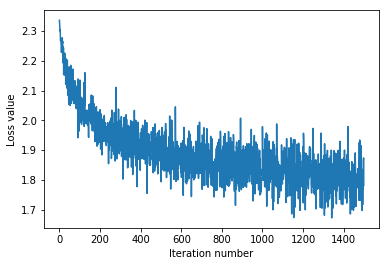

In [10]:
# Implement softmax.train() by filling in the code to extract a batch of data
# and perform the gradient step.
import time


tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took {}s'.format(toc - tic))

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Evaluate the performance of the trained softmax classifier on the validation data.

In [11]:
## Implement softmax.predict() and use it to compute the training and testing error.

y_train_pred = softmax.predict(X_train)
print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))

training accuracy: 0.3811428571428571
validation accuracy: 0.398


## Optimize the softmax classifier

You may copy and paste your optimization code from the SVM here.

In [12]:
np.finfo(float).eps

2.2204460492503131e-16

In [15]:
# ================================================================ #
# YOUR CODE HERE:
#   Train the Softmax classifier with different learning rates and 
#     evaluate on the validation data.
#   Report:
#     - The best learning rate of the ones you tested.  
#     - The best validation accuracy corresponding to the best validation error.
#
#   Select the SVM that achieved the best validation error and report
#     its error rate on the test set.
# ================================================================ #
chosen_rates = [5e-8, 5e-7, 5e-6, 5e-5, 5e-4, 5e-3, 5e-2, 5e-1]
rate_to_err = {}
rate_to_acc = {}
for rate in chosen_rates:
    # train on training data
    softmax.train(X_train, y_train, learning_rate=rate,
                      num_iters=1500, verbose=False)
    # predict on validation dataset
    y_val_pred = softmax.predict(X_val)
    acc = np.mean(np.equal(y_val, y_val_pred))
    err = 1 - acc
    rate_to_err[rate] = err
    rate_to_acc[rate] = acc
    print('Using learning rate = {} validation accuracy: {}, error is {}'.format(rate, acc, err))

best_rate = min(rate_to_err, key = rate_to_err.get)
print('best learning rate: {} and validation accuracy: {} (corresponding to validation error {})'.format(best_rate, rate_to_acc[best_rate], rate_to_err[best_rate]))
# train the softmax with the best learning rate on the training set
softmax.train(X_train, y_train, learning_rate = best_rate, num_iters = 1500, verbose = False)
# run the softmax prediction on the test set now
y_train_pred = softmax.predict(X_test)
acc = np.mean(np.equal(y_test, y_train_pred))
err = 1 - acc
print('Testing error for best softmax using learning rate {} is {}'.format(best_rate, err))
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


Using learning rate = 5e-08 validation accuracy: 0.37, error is 0.63
Using learning rate = 5e-07 validation accuracy: 0.407, error is 0.593
Using learning rate = 5e-06 validation accuracy: 0.38, error is 0.62
Using learning rate = 5e-05 validation accuracy: 0.272, error is 0.728
Using learning rate = 0.0005 validation accuracy: 0.308, error is 0.692
Using learning rate = 0.005 validation accuracy: 0.262, error is 0.738
Using learning rate = 0.05 validation accuracy: 0.295, error is 0.7050000000000001
Using learning rate = 0.5 validation accuracy: 0.293, error is 0.7070000000000001
best learning rate: 5e-07 and validation accuracy: 0.407 (corresponding to validation error 0.593)
Testing error for best softmax using learning rate 5e-07 is 0.618


The best learnign rate I found was $5e-7$ that had a validation accuracy of $0.407$ corresponding to a validation error of $0.407$.

Using this learning rate and running predictions on the testing set, I got a testing error of $0.618$. 